In [1]:
# library and modules
import pandas as pd
import numpy as np

In [2]:
?pd.read_csv

In [4]:
# laodind data
df = pd.read_csv(r"SMSSpamCollection1.csv",
                encoding="ISO-8859-1")
# encoding - UTF8 / ISO-8859-1 /gkb /....
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# rename to make it meaningful
df = df.rename(columns = {"v1":"Category",
                         "v2":"Message"})
df.head()

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    5572 non-null   object
 1   Message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# percentage of data is missing
df.isnull().sum()/len(df)

Category      0.000000
Message       0.000000
Unnamed: 2    0.991027
Unnamed: 3    0.997846
Unnamed: 4    0.998923
dtype: float64

In [8]:
# remove all unnecssary columns
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# HAM -> 0 and SPAM -> 1
# best practice in datascience don't use loop to apply any condition on a columns
df["Target"] = np.where(df["Category"] =="ham",0,1)
df.head()

,Category,Message,Target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
df.to_csv(r"hamspamdata.csv")

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(df["Message"],
                                                df["Target"],
                                                test_size = 0.25,
                                                random_state = 1)

In [14]:
print("Original shape of data :", df.shape[0])
print("Train shape of data :", x_train.shape[0])
print("Test shape of data :", x_test.shape[0])

Original shape of data : 5572
Train shape of data : 4179
Test shape of data : 1393


In [15]:
# first transform our message data into matrix of feature
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [16]:
train = cv.fit_transform(x_train)
train

<4179x7496 sparse matrix of type '<class 'numpy.int64'>'
	with 55614 stored elements in Compressed Sparse Row format>

In [17]:
# test set we need to transform 
test = cv.transform(x_test)
test

<1393x7496 sparse matrix of type '<class 'numpy.int64'>'
	with 17010 stored elements in Compressed Sparse Row format>

In [18]:
# NAIVE BASE ALOGO
from sklearn.naive_bayes import MultinomialNB

In [19]:
model = MultinomialNB()

In [20]:
# train this model on data
model.fit(train , y_train)

MultinomialNB()

In [21]:
# now we will test the model on unseen test data
pred = model.predict(test)

In [22]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
y_test = np.array([i for i in y_test])
print(y_test)

[0 0 0 ... 0 0 0]


In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [25]:
print(confusion_matrix(y_test,pred))

[[1205    8]
 [  12  168]]


In [26]:
print(accuracy_score(y_test,pred))

0.9856424982053122


In [27]:
# here we are classify for spam detection
#our model should classify spam as spam but we will consider if model classify 
#ham as spam it is ok but model should not classify any spam as ham.
# where we need to look for major class we look for precision
print(precision_score(y_test,pred))

0.9545454545454546


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1213
           1       0.95      0.93      0.94       180

    accuracy                           0.99      1393
   macro avg       0.97      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393



### suppose we have a large chunk to test in case when we have single messgae from user then what to do ???

In [29]:
hm = df["Message"][0]
hm

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [30]:
spm = df["Message"][2]
spm

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [31]:
mess = str(input("Enter user Message: "))
tst = cv.transform([mess,])
tst

Enter user Message: hi


<1x7496 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [32]:
PRED = model.predict(tst)
PRED[0]

0

In [33]:
ref = {0:"HAM",1:"SPAM"}
print("Message is classified as :", ref[PRED[0]])

Message is classified as : HAM


In [34]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds  = roc_curve(y_test,pred)

In [35]:
fpr

array([0.        , 0.00659522, 1.        ])

In [36]:
tpr

array([0.        , 0.93333333, 1.        ])

In [37]:
thresholds

array([2, 1, 0])

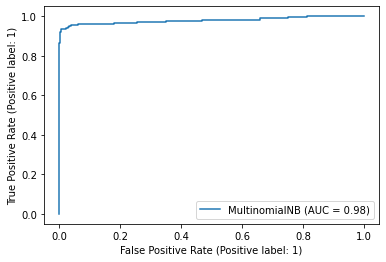

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, test, y_test) 
plt.show()

In [39]:
# lets save this model into a pickle file
import pickle
var = model
# model is python is python object ---> byte type of  object
var = pickle.dumps(var)

In [40]:
f = open(r"model.pickle",
        "wb")
f.write(var)
f.close()

In [41]:
# here we will call the model
f = open(r"model.pickle",
        "rb")
text = f.read()
f.close()

In [42]:
# pickle ---> python obj 
MODEL = pickle.loads(text)

In [43]:
mess = str(input("Enter user Message: "))
tst = cv.transform([mess,])
PRED = MODEL.predict(tst)
ref = {0:"HAM",1:"SPAM"}
print("Message is classified as :", ref[PRED[0]])

Enter user Message: hurrah
Message is classified as : HAM


In [45]:
from tkinter import *
import tkinter
# library and modules
import pandas as pd
import numpy as np
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

# this code create a frame of gui
window = Tk()
# try to fix the size for GUI window
window.geometry("500x300")
# we need to change title for GUI
window.title("EMAIL CLASSIFICATION APPLICATION")

# GUI background color
window.configure(background = "azure")


# Adding a heading label to GUI
Label(window, text="EMAIL MESSAGE CLASSIFICATION APP",
     font = 15,
     bg = "azure",
     fg = "RED",
     relief ="solid",
     width=40).place(x=80,y=30)

Label(window, text="Email Message",
     font = 10,
     bg = "azure",
     fg = "black",
     relief ="solid",
     width=15).place(x=60,y=100)


#entry for message
message = StringVar()
Entry(window, textvariable = message).place(x = 250, y =100)

Label(window, text="MODEL RESULT",
     font = 10,
     bg = "azure",
     fg = "black",
     relief ="solid",
     width=15).place(x=60,y=150)


def PREDICT():
    df1 = pd.read_csv(r"hamspamdata.csv")
    x_train,x_test,y_train,y_test = train_test_split(df1["Message"],
                                                df1["Target"],
                                                test_size = 0.25,
                                                random_state = 1)
    train = cv.fit_transform(x_train)
    # take message from entry window
    test = message.get()
    test = cv.transform([test,])
    # transformation is done
    # in order to predict we will use trained model
    f = open(r"model.pickle",
        "rb")
    text = f.read()
    f.close()
    MODEL = pickle.loads(text)
    pred = MODEL.predict(test)
    ans = pred[0]
    # reference dict
    ref = {0:"HAM" ,1 :"SPAM"}
    ANS = ref[ans]
    if ANS =="HAM":
        Label(window, text="HAM",
        font = 10,
         bg = "azure",
         fg = "green",
         relief ="solid",
         width=15).place(x=250,y=150)
    else:
        Label(window, text="SPAM",
        font = 10,
         bg = "azure",
         fg = "red",
         relief ="solid",
         width=15).place(x=250,y=150)
    

# here are adding a button on GUI
Button(window, text ="Predict",
      bg ="light green",
      fg ="black",
      width =15,
      command =PREDICT).place(x=120,y=200)

def exit():
    window.destroy()

Button(window, text ="exit gui",
       bg ="light green",
       fg ="black",
       width =15,
       command =exit ).place(x=250,y=200)


def info():
    root = Tk()
    root.geometry("800x800")
    link="https://www.kaggle.com/bagavathypriya/spam-ham-dataset"
    Label(root,text="Link for dataset and other info :{}".format(link)).place(x=0,y=0)
    root.resizable(0,0)
    root.mainloop()

Button(window, text ="Information",
       bg ="light green",
       fg ="black",
       width =15,
      command = info).place(x=200,y=250)


# we need to make the window fix it should not enlarge
window.resizable(0,0)
# last code line for tkinter app
window.mainloop()